In [2]:
import pandas as pd

data = pd.read_excel('IE KPMG_Demand_Forecast_dataset.xlsx')

In [3]:
#Examine the Dataframe

In [4]:
#Display the first few rows

In [5]:
print(data.head())

  year_week  ID_material   Units
0   2019-11    120010970   540.0
1   2019-12    120010970   750.0
2   2019-13    120010970   960.0
3   2019-14    120010970   720.0
4   2019-15    120010970  1620.0


In [6]:
#Check the dimensions of the DataFrame (number of rows, number of columns)

In [7]:
print(data.shape)

(2857, 3)


In [8]:
#Get summary statistics of the numerical columns

In [9]:
print(data.describe())

        ID_material        Units
count  2.857000e+03  2857.000000
mean   1.200114e+08  1234.490200
std    3.238410e+03  1296.084905
min    1.200041e+08     0.000000
25%    1.200098e+08   240.000000
50%    1.200116e+08   780.000000
75%    1.200145e+08  1890.000000
max    1.200160e+08  8316.000000


In [10]:
#Check the data types of each column

In [11]:
print(data.dtypes)

year_week       object
ID_material      int64
Units          float64
dtype: object


In [12]:
#Count the number of missing values in each column

In [13]:
print(data.isnull().sum())

year_week      0
ID_material    0
Units          0
dtype: int64


In [14]:
#Convert "year_week" to a datetime type: 

In [15]:
data['year_week'] = pd.to_datetime(data['year_week'] + '-1', format='%Y-%W-%w')

In [16]:
#Sort the DataFrame by the "year_week" column

In [17]:
data = data.sort_values('year_week')

In [18]:
#Check for duplicates

In [19]:
print(data.duplicated().sum())  # Check the number of duplicates


0


In [20]:
data = data.drop_duplicates()   # Remove duplicates


In [21]:
#Plotting the Time Series:

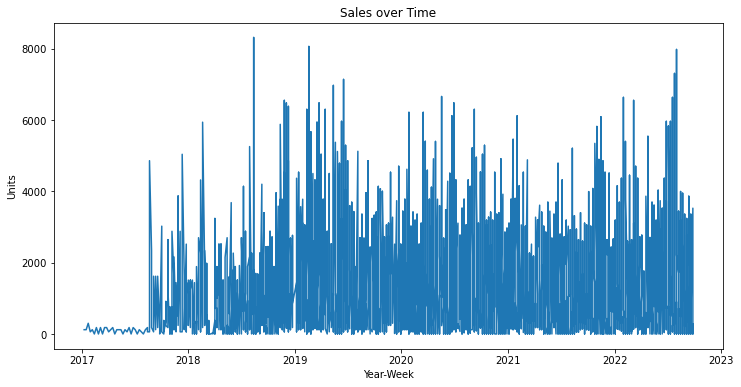

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data['year_week'], data['Units'])
plt.title('Sales over Time')
plt.xlabel('Year-Week')
plt.ylabel('Units')
plt.show()

In [23]:
#Rolling Averages

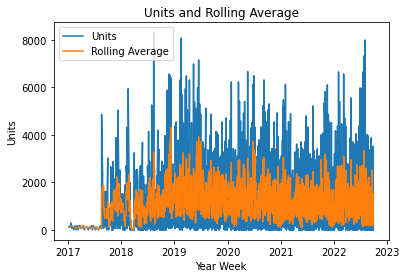

In [24]:
import matplotlib.pyplot as plt

window_size = 4
data['rolling_avg'] = data['Units'].rolling(window_size).mean()

plt.plot(data['year_week'], data['Units'], label='Units')
plt.plot(data['year_week'], data['rolling_avg'], label='Rolling Average')

plt.xlabel('Year Week')
plt.ylabel('Units')
plt.title('Units and Rolling Average')
plt.legend()

plt.show()

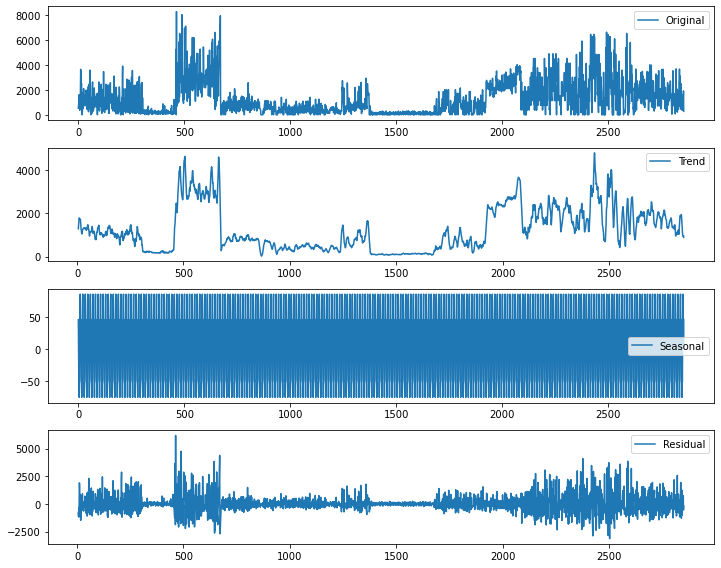

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Read the data from the Excel file
data = pd.read_excel('IE KPMG_Demand_Forecast_dataset.xlsx')

# Extract the relevant time series column
time_series = data['Units']  # Replace 'YourColumnName' with the actual column name

# Perform seasonal decomposition
decomposition = seasonal_decompose(time_series, model='additive', period=12)  # Assuming a seasonal period of 12 months

# Plot the decomposition components
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(time_series, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


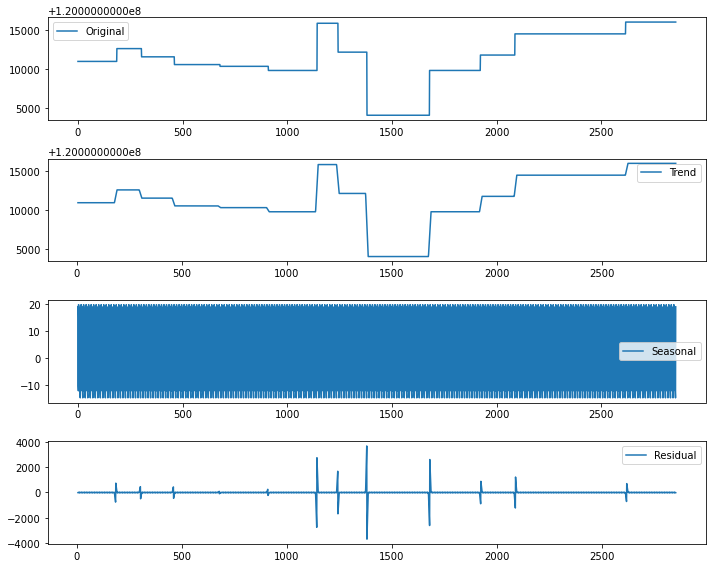

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Read the data from the Excel file
data = pd.read_excel('IE KPMG_Demand_Forecast_dataset.xlsx')

# Extract the relevant time series column
time_series = data['ID_material']  # Replace 'YourColumnName' with the actual column name

# Perform seasonal decomposition
decomposition = seasonal_decompose(time_series, model='additive', period=12)  # Assuming a seasonal period of 12 months

# Plot the decomposition components
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(time_series, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


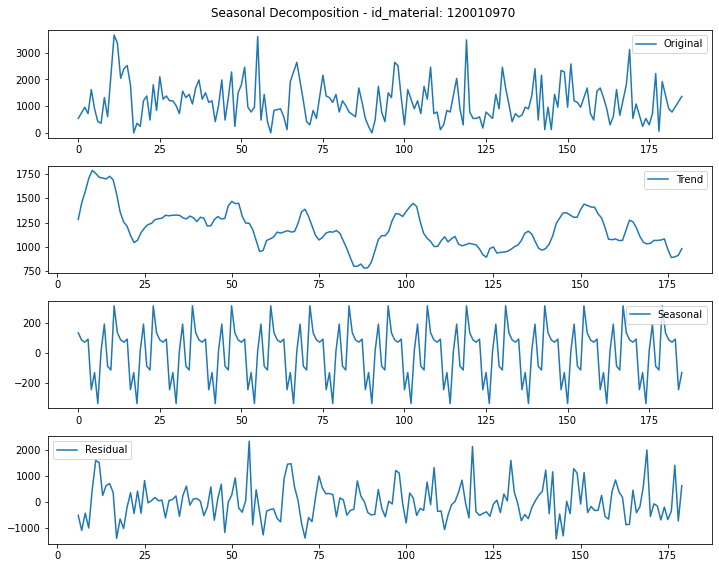

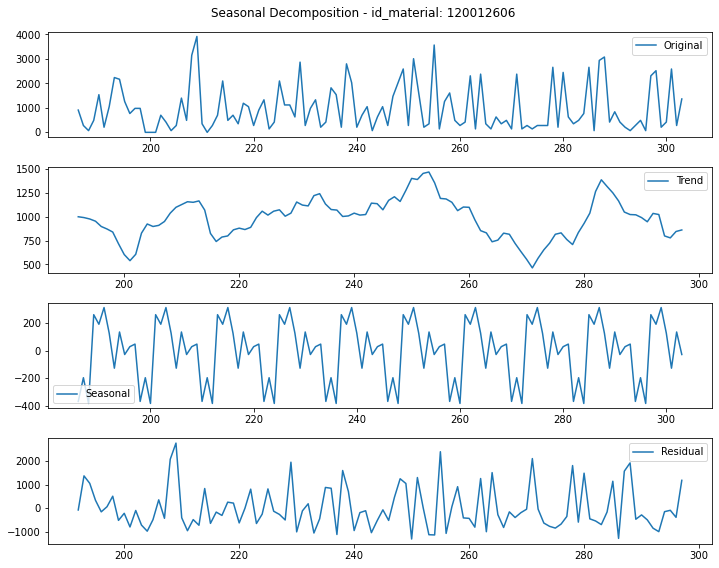

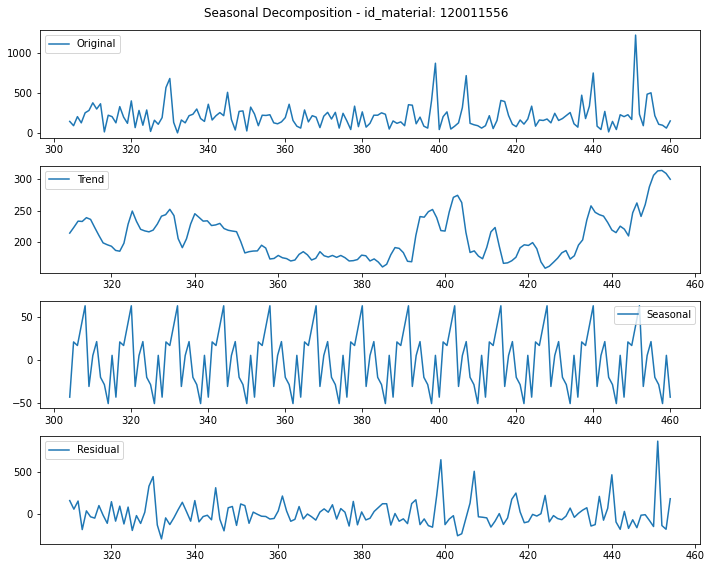

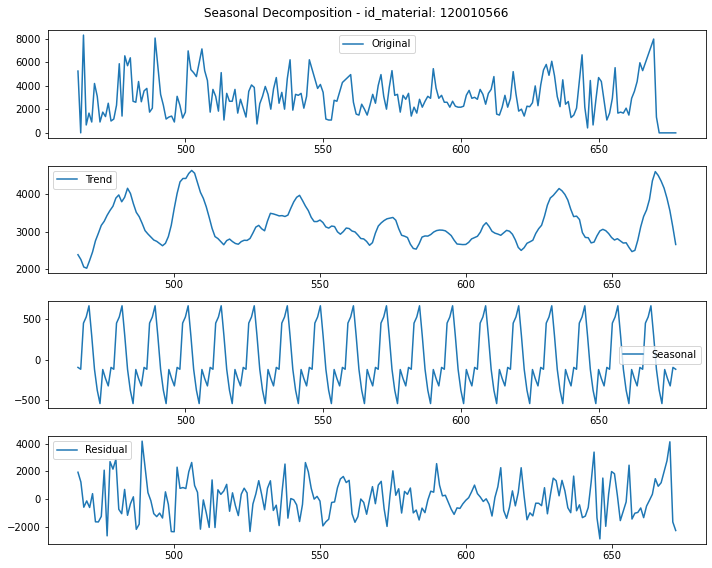

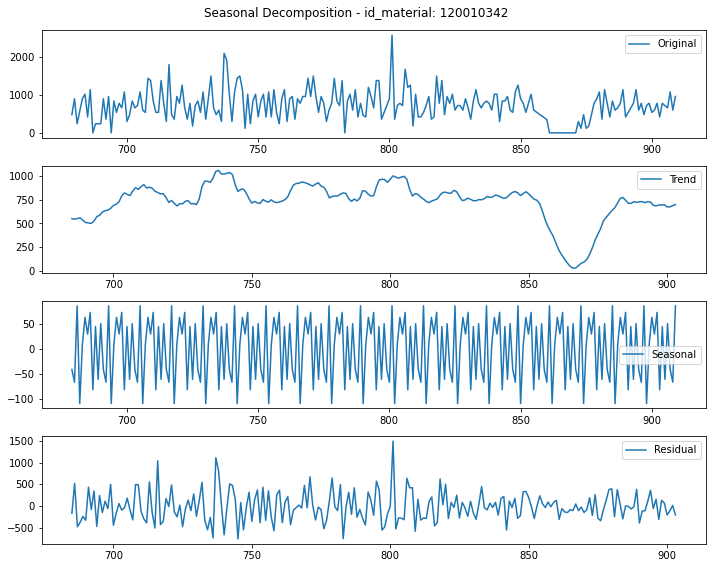

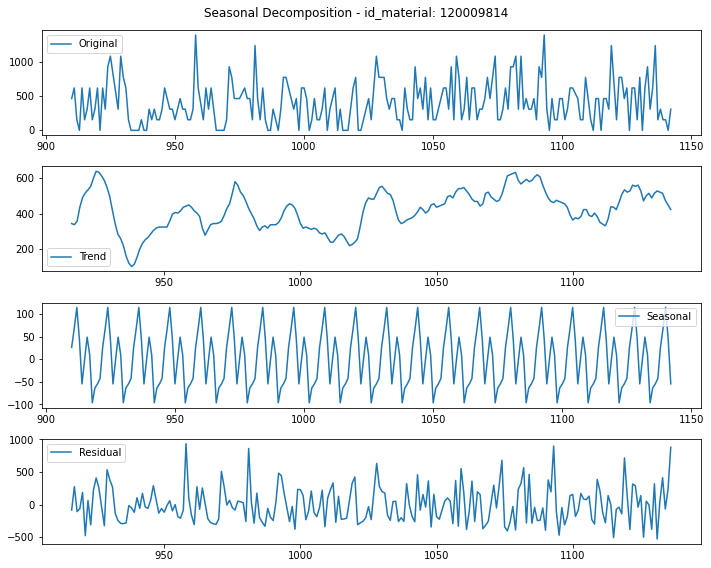

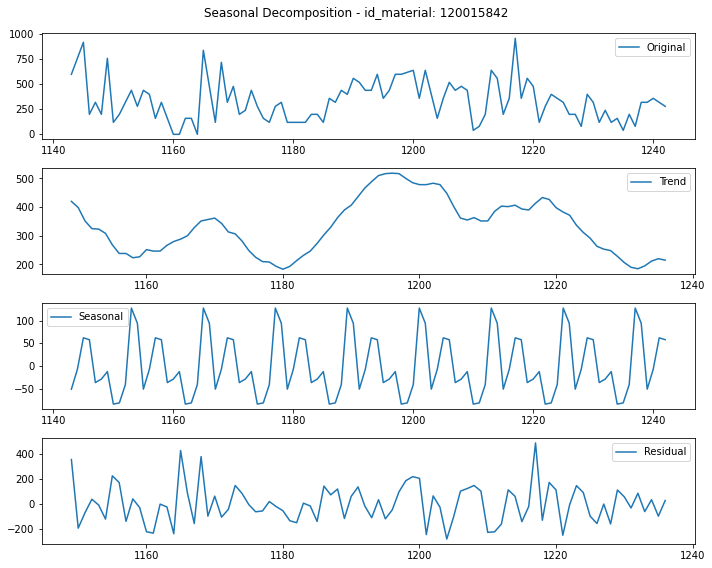

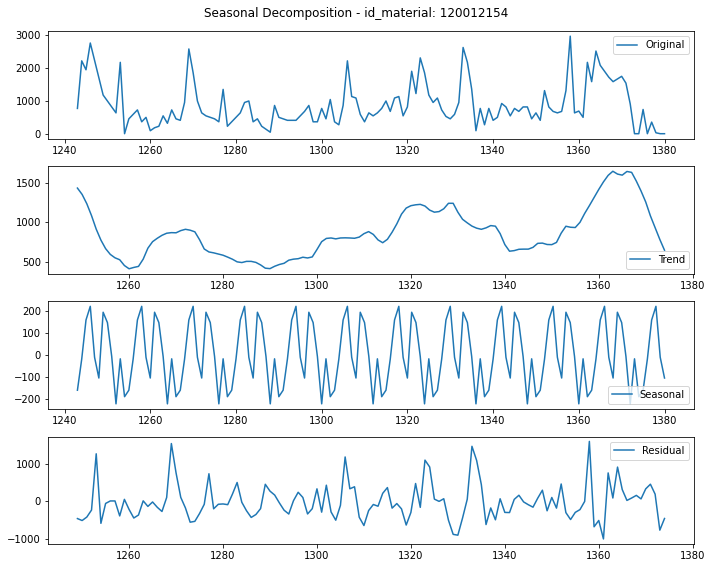

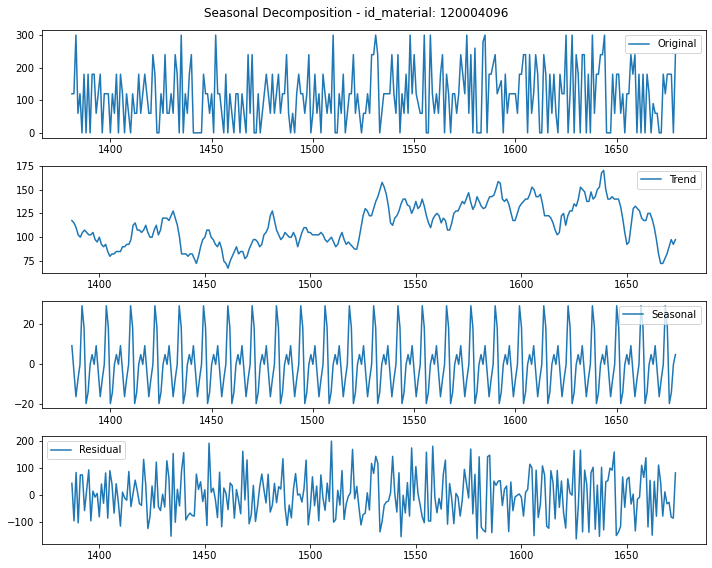

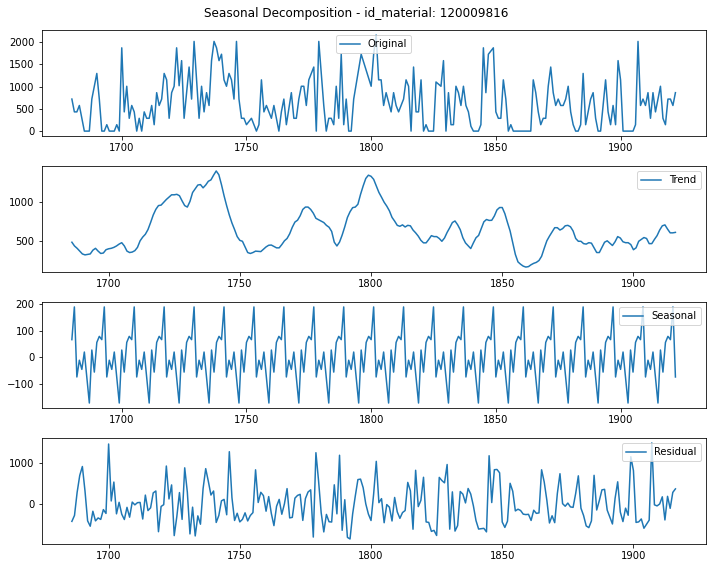

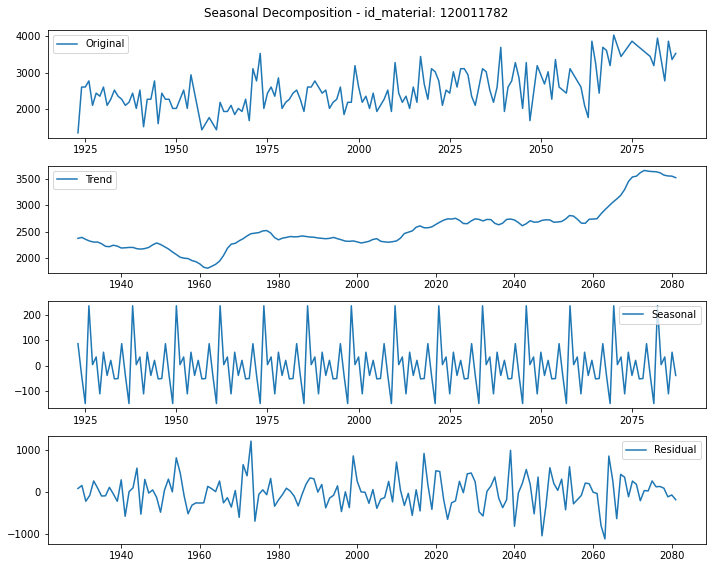

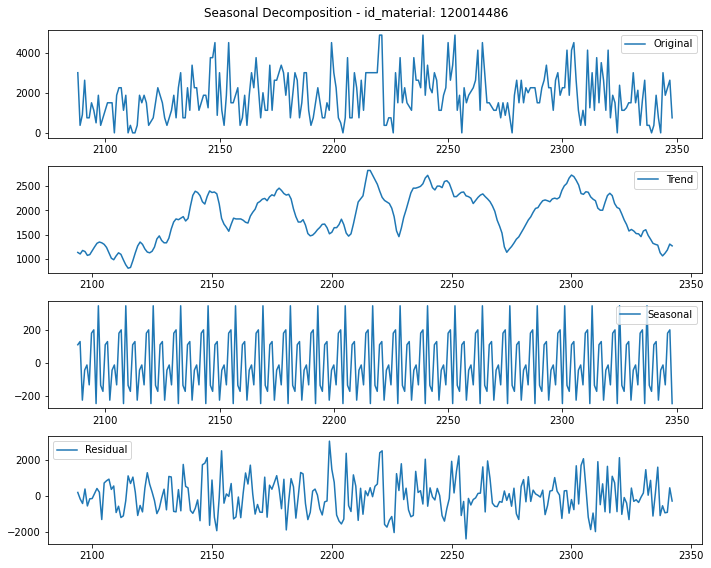

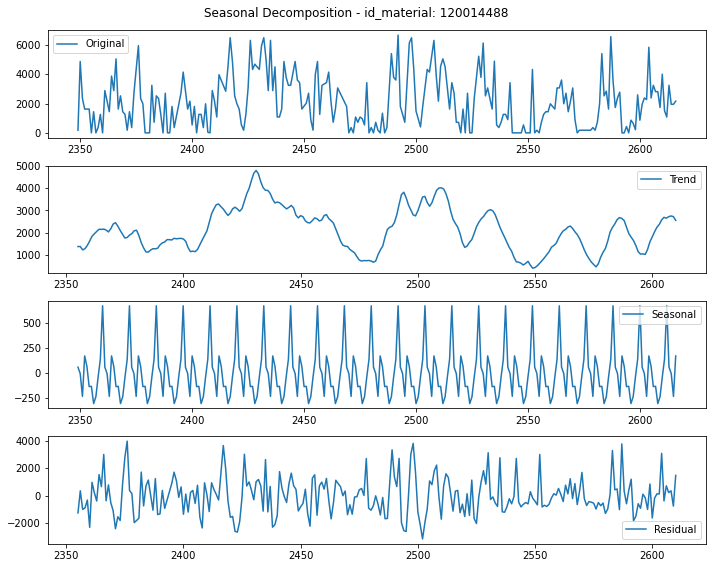

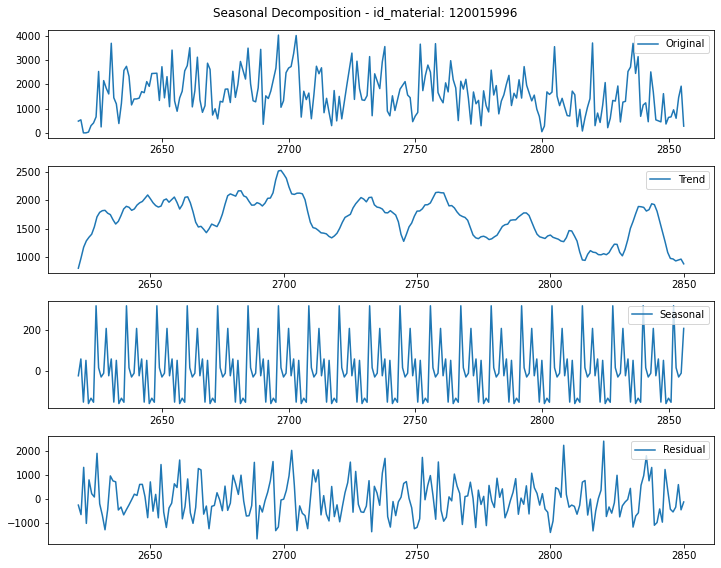

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Read the data from the Excel file
data = pd.read_excel('IE KPMG_Demand_Forecast_dataset.xlsx')

# Extract the relevant columns
id_material_column = 'ID_material'
units_column = 'units'

# Get unique id_materials
unique_materials = data['ID_material'].unique()

# Iterate over each id_material
for material in unique_materials:
    # Filter data for the current id_material
    material_data = data[data['ID_material'] == material]

    # Extract the time series of units for the id_material
    time_series = material_data['Units']

    # Perform seasonal decomposition
    decomposition = seasonal_decompose(time_series, model='additive', period=12)  # Assuming a seasonal period of 12 months

    # Plot the decomposition components
    plt.figure(figsize=(10, 8))
    plt.subplot(411)
    plt.plot(time_series, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonal')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residual')
    plt.legend(loc='best')
    plt.suptitle(f"Seasonal Decomposition - id_material: {material}")
    plt.tight_layout()
    plt.show()


In [25]:
#Time Series Decomposition

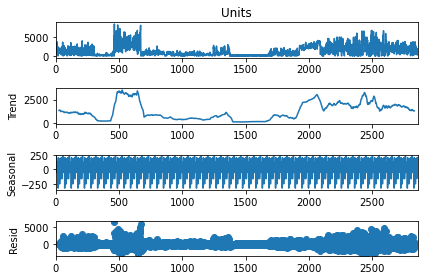

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['Units'], model='additive', period=52)  # Assuming a yearly seasonality
result.plot()
plt.show()

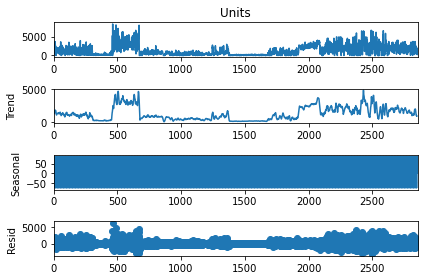

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

result = seasonal_decompose(data['Units'], model='additive', period=12)  # Assuming monthly seasonality
result.plot()
plt.show()


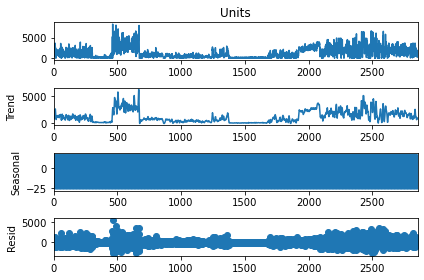

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

result = seasonal_decompose(data['Units'], model='additive', period=6)  # Assuming monthly seasonality
result.plot()
plt.show()

In [29]:
#Based on the provided time series decomposition codes and their resulting graphs, 
#here are some deductions you can make about the data:

#Stationarity: Since the units graph remains constant across all three decompositions, 
#it suggests that your data is stationary or has a relatively stable overall level. 
#Stationarity means that the statistical properties of the data, such as the mean and variance, 
#do not change over time.

#Consistent Trend: Although the magnitudes of the trend component differ in the three 
#decompositions, the fact that the trend shapes are similar indicates a consistent 
#long-term pattern or direction in your data. This suggests the presence of a trend that 
#is consistent across different time scales, whether it be yearly, monthly, or every six periods.

#Seasonality: The seasonal component's absence or negligible impact on the data can be inferred 
#from the constant units and residuals graphs across all three decompositions. This suggests 
#that there is no strong or significant seasonal pattern in the data.

#Residuals: The constant residual graphs in all three decompositions indicate that the models 
#successfully capture and explain the majority of the observed variability in your data through 
#the trend and, possibly, the seasonal components. The small residual fluctuations imply that 
#there is little unexplained randomness or noise left in the data after accounting for the 
#trend and seasonality.
#In summary, based on these deductions, your data appears to have a stable overall level with 
#a consistent long-term trend. There is no significant seasonality, and the models used in the 
#decompositions successfully capture the majority of the observed patterns and fluctuations, 
#resulting in relatively small residuals.

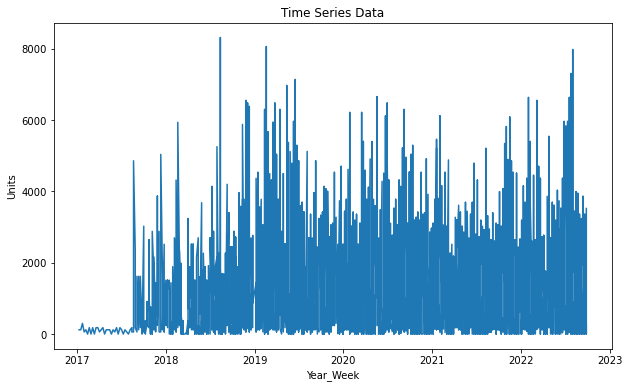

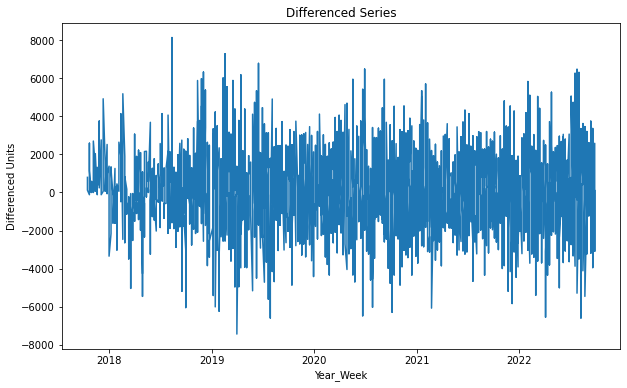

<Figure size 720x432 with 0 Axes>

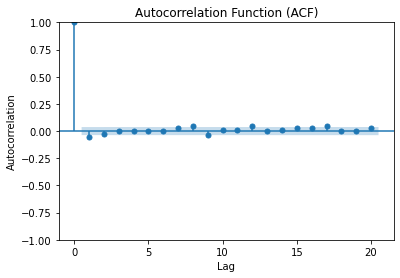

/Users/jungo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 720x432 with 0 Axes>

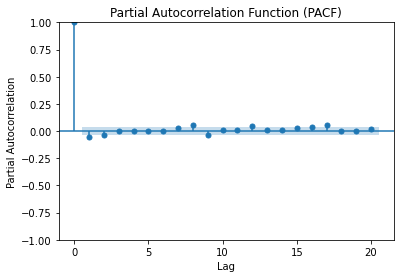

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming you have already loaded your time series data into a pandas DataFrame called 'data'

# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(data['year_week'], data['Units'])
plt.title('Time Series Data')
plt.xlabel('Year_Week')
plt.ylabel('Units')
plt.show()

# Seasonal differencing
seasonality = 52  # Assuming weekly data with a yearly seasonality
data['Differenced'] = data['Units'].diff(seasonality)

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(data['year_week'], data['Differenced'])
plt.title('Differenced Series')
plt.xlabel('Year_Week')
plt.ylabel('Differenced Units')
plt.show()

# Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)
lag_acf = acf(data['Differenced'].dropna(), nlags=20)
lag_pacf = pacf(data['Differenced'].dropna(), nlags=20, method='ols')

# Plot ACF
plt.figure(figsize=(10, 6))
plot_acf(data['Differenced'].dropna(), lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF
plt.figure(figsize=(10, 6))
plot_pacf(data['Differenced'].dropna(), lags=20)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()


In [41]:
import pandas as pd
from pmdarima import auto_arima

# Read the data from the Excel file
data = pd.read_excel('IE KPMG_Demand_Forecast_dataset.xlsx')

# Specify the seasonal period (if applicable)
seasonal_period = 12  # For monthly data, assuming 12 months in a year

# Remove any non-numeric columns or columns not needed for modeling
data = data.select_dtypes(include='number')

# Reshape the data into a single column
data_reshaped = data.values.reshape(-1)

# Fit auto_arima model
model = auto_arima(data_reshaped, seasonal=True, m=seasonal_period, trace=True)

# Print the selected model's order
print(f"ARIMA{model.order}x{model.seasonal_order}")


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=95387.502, Time=26.04 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=95189.414, Time=0.21 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=95366.264, Time=5.15 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=95193.073, Time=14.01 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=95187.584, Time=0.12 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=95191.900, Time=3.38 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=95191.953, Time=9.33 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=95193.415, Time=14.72 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=95190.930, Time=1.02 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=95190.995, Time=1.20 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=95193.409, Time=1.90 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12]          
Total fit time: 77.150 seconds
ARIMA(0, 0, 0)x(0, 1, 0, 12)


In [31]:
import pandas as pd
from pmdarima import auto_arima

# Read the data from the Excel file
data = pd.read_excel('IE KPMG_Demand_Forecast_dataset.xlsx')

# Specify the seasonal period (if applicable)
seasonal_period = 12  # For monthly data, assuming 12 months in a year

# Remove any non-numeric columns or columns not needed for modeling
data = data.select_dtypes(include='number')

# Flatten the data into a single column
data_flat = data.values.flatten()

# Fit auto_arima model
model = auto_arima(data_flat, seasonal=True, m=seasonal_period, trace=True)

# Print the selected model's order
print(f"ARIMA{model.order}x{model.seasonal_order}")


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=95387.502, Time=26.64 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=95189.414, Time=0.23 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=95366.264, Time=5.46 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=95193.073, Time=14.23 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=95187.584, Time=0.14 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=95191.900, Time=3.56 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=95191.953, Time=9.52 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=95193.415, Time=13.62 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=95190.930, Time=1.00 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=95190.995, Time=1.17 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=95193.409, Time=1.87 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12]          
Total fit time: 78.095 seconds
ARIMA(0, 0, 0)x(0, 1, 0, 12)


In [32]:
#The ARIMA(0,0,0) model is also known as a white noise model, where there is no 
#autoregressive or moving average component. It assumes that the data points are 
#independent and identically distributed (i.i.d) with a constant mean and variance.
#our data is: stationary, not seasonal, so if we include the seasonal values or not 
#it will not matter and it's proven at the end of the notebook in the forecast values.

In [33]:
import pandas as pd
from pmdarima import auto_arima

# Read the data from the Excel file
data = pd.read_excel('IE KPMG_Demand_Forecast_dataset.xlsx')

# Remove any non-numeric columns or columns not needed for modeling
data = data.select_dtypes(include='number')

# Reshape the data into a single column
data_stacked = data.stack().reset_index(drop=True)

# Fit auto_arima model without seasonality
model = auto_arima(data_stacked, seasonal=False, trace=True)

# Print the selected model's order
print("ARIMA{} - No Seasonality".format(model.order))

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=335239.369, Time=2.37 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=224853.185, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=224855.185, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=224855.185, Time=0.06 sec


/Users/jungo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=224857.185, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=220894.424, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=1.33 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=103588.850, Time=0.91 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=7537690.531, Time=2.63 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=99773.440, Time=2.02 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3737254.107, Time=3.21 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=97290.418, Time=2.32 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.83 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=4153374.677, Time=4.02 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=96196.302, Time=3.36 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=215237.213, Time=1.01 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=2255270.632, Time=4.64 sec
 ARIMA(

In [42]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Read the data from the Excel file
data = pd.read_excel('IE KPMG_Demand_Forecast_dataset.xlsx')

# Preprocess the data if needed

# Split the data into training and testing sets
train_data, test_data = train_test_split(data['Units'], test_size=0.2, shuffle=False)

# Fit the ARIMA model
model = ARIMA(train_data, order=(0, 0, 0), seasonal_order=(0, 1, 0, 12))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Units   No. Observations:                 2285
Model:             ARIMA(0, 1, 0, 12)   Log Likelihood              -19166.136
Date:                Mon, 12 Jun 2023   AIC                          38334.271
Time:                        15:47:09   BIC                          38340.000
Sample:                             0   HQIC                         38336.361
                               - 2285                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.228e+06   1.67e+04     73.690      0.000     1.2e+06    1.26e+06
Ljung-Box (L1) (Q):                 275.78   Jarque-Bera (JB):              5265.32
Prob(Q):                              0.00   Pr

In [43]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Read the data from the Excel file
data = pd.read_excel('IE KPMG_Demand_Forecast_dataset.xlsx')

# Preprocess the data if needed

# Fit the ARIMA model
model = ARIMA(data['Units'], order=(0, 0, 0), seasonal_order=(0, 1, 0, 12))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Units   No. Observations:                 2857
Model:             ARIMA(0, 1, 0, 12)   Log Likelihood              -24493.731
Date:                Mon, 12 Jun 2023   AIC                          48989.462
Time:                        15:47:10   BIC                          48995.415
Sample:                             0   HQIC                         48991.609
                               - 2857                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.753e+06   2.56e+04     68.402      0.000     1.7e+06     1.8e+06
Ljung-Box (L1) (Q):                 454.15   Jarque-Bera (JB):              2429.37
Prob(Q):                              0.00   Pr

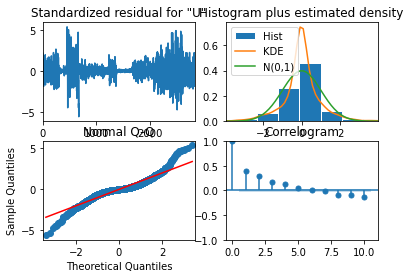

In [44]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Read the data from the Excel file
data = pd.read_excel('IE KPMG_Demand_Forecast_dataset.xlsx')

# Preprocess the data if needed
# Split the data into training and testing sets
train_data, test_data = train_test_split(data['Units'], test_size=0.2, shuffle=False)

# Fit the ARIMA model
model = ARIMA(data['Units'], order=(0, 0, 0), seasonal_order=(0, 1, 0, 12))
model_fit = model.fit()

# Plot diagnostics
model_fit.plot_diagnostics()
plt.show()


In [45]:
import numpy as np

# Fit the ARIMA model
model = ARIMA(train_data, order=(0, 1, 0), seasonal_order=(0, 1, 0, 12))
model_fit = model.fit()

# Split the data into training and testing sets
train_data, test_data = train_test_split(data['Units'], test_size=0.2, shuffle=False)

# Get predictions and actual values from the ARIMA model
predictions = model_fit.predict()
actual_values = data['Units']

# Reset index for predictions and actual_values
predictions = predictions.reset_index(drop=True)
actual_values = actual_values.reset_index(drop=True)

# Remove missing values
valid_indices = np.logical_and(~np.isnan(predictions), ~np.isnan(actual_values))
predictions = predictions[valid_indices]
actual_values = actual_values[valid_indices]

# Calculate evaluation metrics
mae = np.mean(np.abs(predictions - actual_values))
mse = np.mean((predictions - actual_values) ** 2)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Mean Absolute Error(MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error(RMSE):", rmse)


Mean Absolute Error(MAE): 786.5636315014152
Mean Squared Error (MSE): 1601315.8097259605
Root Mean Squared Error(RMSE): 1265.4310766398778


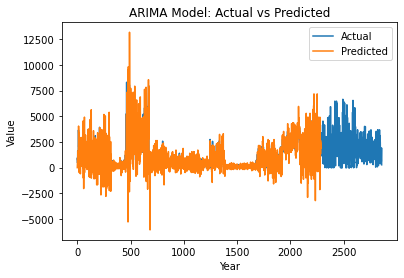

In [46]:
import matplotlib.pyplot as plt

# Plot the predicted values against the actual values
plt.plot(actual_values, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('ARIMA Model: Actual vs Predicted')
plt.legend()
plt.show()

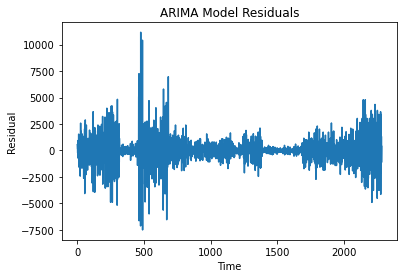

/Users/jungo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


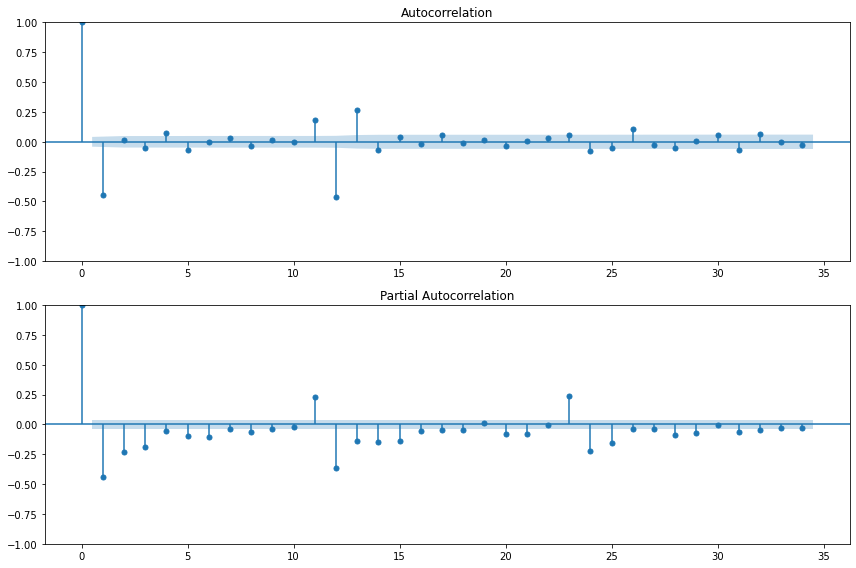

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Obtain the residuals from the ARIMA model
residuals = model_fit.resid

# Plot the residuals
plt.plot(residuals)
plt.xlabel('Time')
plt.ylabel('Residual')
plt.title('ARIMA Model Residuals')
plt.show()

# Plot ACF and PACF of residuals
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(residuals, ax=ax[0])
plot_pacf(residuals, ax=ax[1])
plt.tight_layout()
plt.show()

In [48]:
# Specify the number of steps to forecast
forecast_steps = 2

# Use the trained ARIMA model to forecast future values
forecast = model_fit.forecast(steps=forecast_steps)

# Print the forecasted values
print("Forecasted Values for the Next Two Months:")
print(forecast)



Forecasted Values for the Next Two Months:
2285    1512.0
2286    2268.0
Name: predicted_mean, dtype: float64


In [49]:
!pip install xgboost

In [50]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Read the data from the Excel file
data = pd.read_excel('IE KPMG_Demand_Forecast_dataset.xlsx')

# Convert the "year_week" column to a datetime format
data['year_week'] = pd.to_datetime(data['year_week'] + '-1', format='%Y-%W-%w')

# Sort the data by the "year_week" column in ascending order
data = data.sort_values('year_week')

# Split the data into training and testing sets
train_data = data[:-2]  # Use all except the last two rows as training data
test_data = data[-2:]   # Use the last two rows as testing data

# Prepare the training and testing datasets
X_train = train_data.drop(['year_week', 'Units'], axis=1)  # Input features for training
y_train = train_data['Units']                              # Target variable for training

X_test = test_data.drop(['year_week', 'Units'], axis=1)    # Input features for testing
y_test = test_data['Units']                                # Actual values for testing

# Create the XGBoost model
model = xgb.XGBRegressor()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("XGBoost Model Evaluation:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


XGBoost Model Evaluation:
Mean Absolute Error (MAE): 866.3701782226562
Mean Squared Error (MSE): 981738.9167173579
Root Mean Squared Error (RMSE): 990.8273899713098


In [51]:
import pandas as pd
import xgboost as xgb

# Read the data from the Excel file
data = pd.read_excel('IE KPMG_Demand_Forecast_dataset.xlsx')

# Convert the "year_week" column to a datetime format
data['year_week'] = pd.to_datetime(data['year_week'] + '-1', format='%Y-%W-%w')

# Prepare the data for modeling
data.set_index('year_week', inplace=True)
data.sort_index(inplace=True)

# Split the data into training and testing sets
train_data = data[:-2]  # Use all data except the last two months as training data
test_data = data[-2:]   # Use the last two months as testing data

# Prepare the training and testing datasets
X_train = train_data.drop('Units', axis=1)  # Input features for training
y_train = train_data['Units']                # Target variable for training
X_test = test_data.drop('Units', axis=1)    # Input features for testing

# Fit the XGBoost model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Make predictions for the next two months
forecast = model.predict(X_test)

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame(forecast, index=X_test.index, columns=['forecasted_units'])

# Print the forecasted values for the next two months
print("Forecasted Values for the Next Two Months:")
print(forecast_df)


Forecasted Values for the Next Two Months:
            forecasted_units
year_week                   
2022-09-26        979.401733
2022-09-26       1623.142090


In [52]:
import pandas as pd
from pmdarima import auto_arima

# Read the data from the Excel file
data = pd.read_excel('IE KPMG_Demand_Forecast_dataset.xlsx')

# Remove any non-numeric columns or columns not needed for modeling
data = data.select_dtypes(include='number')

# Reshape the data into a single column
data_stacked = data.stack().reset_index(drop=True)

# Fit auto_arima model without seasonality
model = auto_arima(data_stacked, seasonal=False, trace=True)

# Print the selected model's order
print("ARIMA{} - No Seasonality".format(model.order))


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=335239.369, Time=2.43 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=224853.185, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=224855.185, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=224855.185, Time=0.06 sec


/Users/jungo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=224857.185, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=220894.424, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=1.36 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=103588.850, Time=0.92 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=7537690.531, Time=2.66 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=99773.440, Time=2.08 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3737254.107, Time=3.26 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=97290.418, Time=2.37 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=4153374.677, Time=4.04 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=96196.302, Time=3.46 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=215237.213, Time=1.00 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=2255270.632, Time=4.54 sec
 ARIMA(

/Users/jungo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


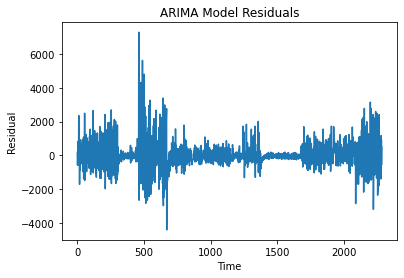

/Users/jungo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


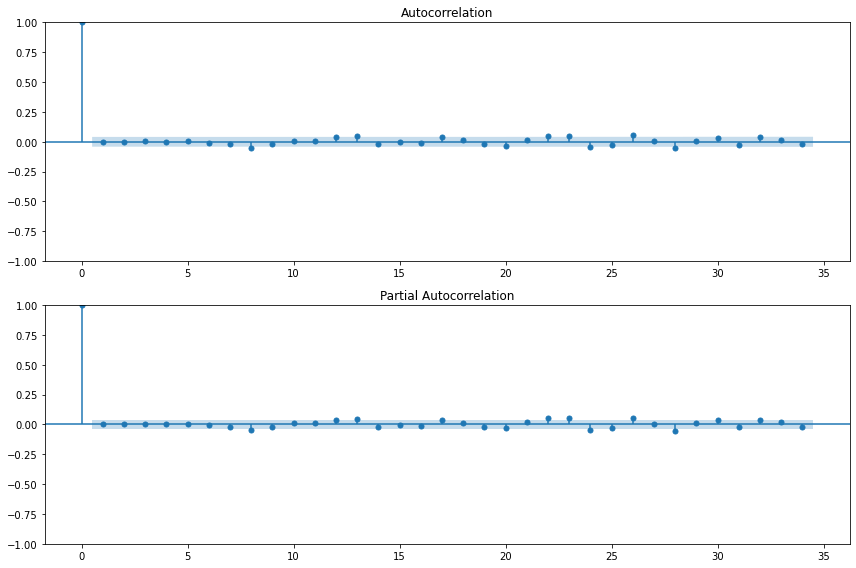

In [54]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Read the data from the Excel file
data = pd.read_excel('IE KPMG_Demand_Forecast_dataset.xlsx')

# Preprocess the data if needed

# Split the data into training and testing sets
train_data, test_data = train_test_split(data['Units'], test_size=0.2, shuffle=False)

# Fit the ARIMA model
model = ARIMA(train_data, order=(1, 0, 5), seasonal_order=(0, 0, 0, 0), trend='c')
model_fit = model.fit()

# Obtain the residuals from the ARIMA model
residuals = model_fit.resid

# Plot the residuals
plt.plot(residuals)
plt.xlabel('Time')
plt.ylabel('Residual')
plt.title('ARIMA Model Residuals')
plt.show()

# Plot ACF and PACF of residuals
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(residuals, ax=ax[0])
plot_pacf(residuals, ax=ax[1])
plt.tight_layout()
plt.show()


/Users/jungo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


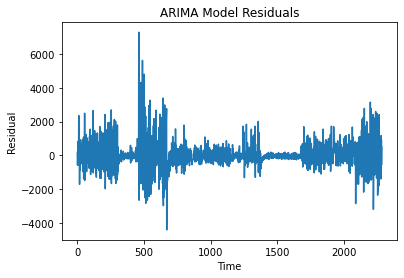

/Users/jungo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


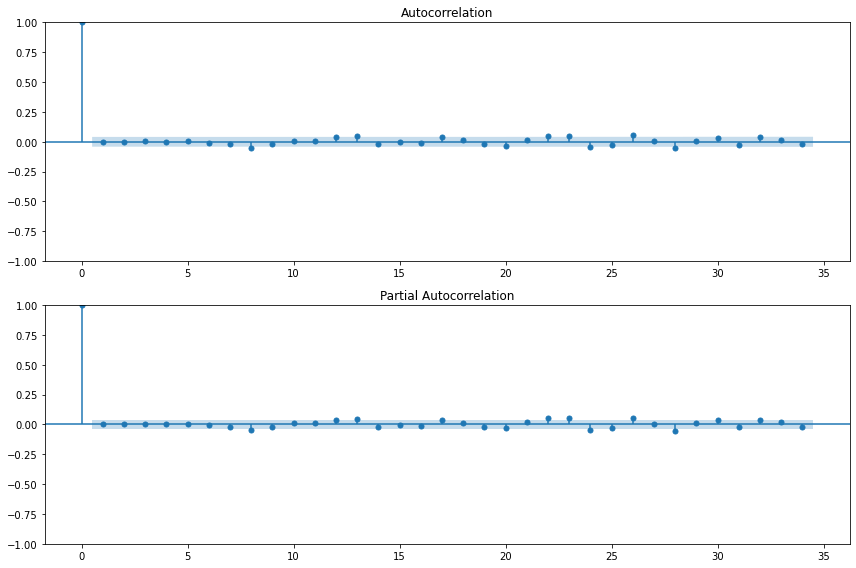

In [55]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Obtain the residuals from the ARIMA model
residuals = model_fit.resid

# Split the data into training and testing sets
train_data, test_data = train_test_split(data['Units'], test_size=0.2, shuffle=False)

# Fit the ARIMA model
model = ARIMA(train_data, order=(1, 0, 5), seasonal_order=(0, 0, 0, 0), trend='c')
model_fit = model.fit()


# Plot the residuals
plt.plot(residuals)
plt.xlabel('Time')
plt.ylabel('Residual')
plt.title('ARIMA Model Residuals')
plt.show()

# Plot ACF and PACF of residuals
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(residuals, ax=ax[0])
plot_pacf(residuals, ax=ax[1])
plt.tight_layout()
plt.show()


In [56]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Read the data from the Excel file
data = pd.read_excel('IE KPMG_Demand_Forecast_dataset.xlsx')

# Split the data into training and testing sets
train_data, test_data = train_test_split(data['Units'], test_size=0.2, shuffle=False)

# Fit the ARIMA model
model = ARIMA(train_data, order=(1, 0, 5))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())


/Users/jungo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                  Units   No. Observations:                 2285
Model:                 ARIMA(1, 0, 5)   Log Likelihood              -18375.436
Date:                Mon, 12 Jun 2023   AIC                          36766.872
Time:                        15:48:18   BIC                          36812.745
Sample:                             0   HQIC                         36783.603
                               - 2285                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1069.1909    505.819      2.114      0.035      77.804    2060.577
ar.L1          0.9940      0.002    405.557      0.000       0.989       0.999
ma.L1         -0.6426      0.011    -57.556      0.0

In [57]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Read the data from the Excel file
data = pd.read_excel('IE KPMG_Demand_Forecast_dataset.xlsx')

# Assuming you have already preprocessed your data and selected the relevant columns

# Fit the ARIMA model
order = (1,0,5)  # Specify the order of the ARIMA model (p, d, q)
model_arima = ARIMA(data['Units'], order=order).fit()

# Perform forecasting for the next two months
forecast_steps = 60  # Assuming daily data and 2 months (60 days)

# Reset the index of data
data = data.reset_index()

# Extend the DataFrame with NaN values for the forecasted periods
extended_df = data.reindex(pd.RangeIndex(len(data) + forecast_steps))

# Get the forecasted values, stderr, and confidence intervals
forecast = model_arima.get_forecast(steps=forecast_steps)
forecasted_values = forecast.predicted_mean
stderr = forecast.se_mean
conf_int = forecast.conf_int()

# Update the extended DataFrame with the forecasted values
extended_df['Forecast'] = np.nan
extended_df.loc[len(data):, 'Forecast'] = forecasted_values

# Extract the forecasted values and confidence intervals
forecasted_values_series = extended_df['Forecast'].tail(forecast_steps)
confidence_intervals = conf_int[-forecast_steps:]

print("Forecasted values for the next two months:")
print(forecasted_values_series)
print("\nConfidence Intervals:")
print(confidence_intervals)



Forecasted values for the next two months:
2857     973.226749
2858     999.587995
2859    1074.428336
2860    1041.298054
2861    1140.457156
2862    1141.071683
2863    1141.682193
2864    1142.288714
2865    1142.891270
2866    1143.489889
2867    1144.084596
2868    1144.675416
2869    1145.262375
2870    1145.845498
2871    1146.424810
2872    1147.000336
2873    1147.572101
2874    1148.140130
2875    1148.704446
2876    1149.265074
2877    1149.822039
2878    1150.375363
2879    1150.925072
2880    1151.471188
2881    1152.013734
2882    1152.552736
2883    1153.088214
2884    1153.620194
2885    1154.148696
2886    1154.673745
2887    1155.195362
2888    1155.713571
2889    1156.228392
2890    1156.739850
2891    1157.247965
2892    1157.752759
2893    1158.254254
2894    1158.752472
2895    1159.247434
2896    1159.739161
2897    1160.227674
2898    1160.712995
2899    1161.195145
2900    1161.674143
2901    1162.150011
2902    1162.622769
2903    1163.092438
2904    1163.5590

In [58]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Read the data from the Excel file
data = pd.read_excel('IE KPMG_Demand_Forecast_dataset.xlsx')

# Assuming you have already preprocessed your data and selected the relevant columns

# Fit the ARIMA model
order = (1,1,3)  # Specify the order of the ARIMA model (p, d, q)
model_arima = ARIMA(data['Units'], order=order).fit()

# Perform forecasting for the next two months
forecast_steps = 60  # Assuming daily data and 2 months (60 days)

# Reset the index of data
data = data.reset_index()

# Extend the DataFrame with NaN values for the forecasted periods
extended_df = data.reindex(pd.RangeIndex(len(data) + forecast_steps))

# Get the forecasted values, stderr, and confidence intervals
forecast = model_arima.get_forecast(steps=forecast_steps)
forecasted_values = forecast.predicted_mean
stderr = forecast.se_mean
conf_int = forecast.conf_int()

# Update the extended DataFrame with the forecasted values
extended_df['Forecast'] = np.nan
extended_df.loc[len(data):, 'Forecast'] = forecasted_values

# Extract the forecasted values and confidence intervals
forecasted_values_series = extended_df['Forecast'].tail(forecast_steps)
confidence_intervals = conf_int[-forecast_steps:]

print("Forecasted values for the next two months:")
print(forecasted_values_series)
print("\nConfidence Intervals:")
print(confidence_intervals)


Forecasted values for the next two months:
2857     999.713630
2858    1006.656670
2859    1076.468579
2860    1117.437633
2861    1141.480284
2862    1155.589692
2863    1163.869784
2864    1168.728949
2865    1171.580545
2866    1173.254002
2867    1174.236068
2868    1174.812393
2869    1175.150609
2870    1175.349090
2871    1175.465569
2872    1175.533924
2873    1175.574039
2874    1175.597580
2875    1175.611395
2876    1175.619502
2877    1175.624260
2878    1175.627052
2879    1175.628691
2880    1175.629652
2881    1175.630217
2882    1175.630548
2883    1175.630742
2884    1175.630856
2885    1175.630923
2886    1175.630962
2887    1175.630985
2888    1175.630999
2889    1175.631007
2890    1175.631011
2891    1175.631014
2892    1175.631016
2893    1175.631017
2894    1175.631017
2895    1175.631018
2896    1175.631018
2897    1175.631018
2898    1175.631018
2899    1175.631018
2900    1175.631018
2901    1175.631018
2902    1175.631018
2903    1175.631018
2904    1175.6310

In [59]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Read the data from the Excel file
data = pd.read_excel('IE KPMG_Demand_Forecast_dataset.xlsx')

# Assuming you have already preprocessed your data and selected the relevant columns

# Perform forecasting for the next two months
forecast_steps = 60  # Assuming daily data and 2 months (60 days)

# Reset the index of data
data = data.reset_index()

# Extend the DataFrame with NaN values for the forecasted periods
extended_df = data.reindex(pd.RangeIndex(len(data) + forecast_steps))

# Get the forecasted values, stderr, and confidence intervals
forecast = model_arima.get_forecast(steps=forecast_steps)
forecasted_values = forecast.predicted_mean
stderr = forecast.se_mean
conf_int = forecast.conf_int()

# Update the extended DataFrame with the forecasted values
extended_df['Forecast'] = np.nan
extended_df.loc[len(data):, 'Forecast'] = forecasted_values

# Extract the forecasted values and confidence intervals
forecasted_values_series = extended_df['Forecast'].tail(forecast_steps)
confidence_intervals = conf_int[-forecast_steps:]

print("Forecasted values for the next two months:")
print(forecasted_values_series)
print("\nConfidence Intervals:")
print(confidence_intervals)


Forecasted values for the next two months:
2857     999.713630
2858    1006.656670
2859    1076.468579
2860    1117.437633
2861    1141.480284
2862    1155.589692
2863    1163.869784
2864    1168.728949
2865    1171.580545
2866    1173.254002
2867    1174.236068
2868    1174.812393
2869    1175.150609
2870    1175.349090
2871    1175.465569
2872    1175.533924
2873    1175.574039
2874    1175.597580
2875    1175.611395
2876    1175.619502
2877    1175.624260
2878    1175.627052
2879    1175.628691
2880    1175.629652
2881    1175.630217
2882    1175.630548
2883    1175.630742
2884    1175.630856
2885    1175.630923
2886    1175.630962
2887    1175.630985
2888    1175.630999
2889    1175.631007
2890    1175.631011
2891    1175.631014
2892    1175.631016
2893    1175.631017
2894    1175.631017
2895    1175.631018
2896    1175.631018
2897    1175.631018
2898    1175.631018
2899    1175.631018
2900    1175.631018
2901    1175.631018
2902    1175.631018
2903    1175.631018
2904    1175.6310

In [60]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Read the data from the Excel file
data = pd.read_excel('IE KPMG_Demand_Forecast_dataset.xlsx')

# Assuming you have already preprocessed your data and selected the relevant columns

# Fit the ARIMA model
order = (0, 0, 0)  # Specify the order of the ARIMA model (p, d, q)
seasonal_order = (0, 1, 0, 12)  # Specify the seasonal order of the ARIMA model (P, D, Q, S)
model_arima = ARIMA(data['Units'], order=order, seasonal_order=seasonal_order).fit()

# Perform forecasting for the next two months
forecast_steps = 60  # Assuming daily data and 2 months (60 days)

# Reset the index of data
data = data.reset_index()

# Extend the DataFrame with NaN values for the forecasted periods
extended_df = data.reindex(pd.RangeIndex(len(data) + forecast_steps))

# Get the forecasted values, stderr, and confidence intervals
forecast = model_arima.get_forecast(steps=forecast_steps)
forecasted_values = forecast.predicted_mean
stderr = forecast.se_mean
conf_int = forecast.conf_int()

# Update the extended DataFrame with the forecasted values
extended_df['Forecast'] = np.nan
extended_df.loc[len(data):, 'Forecast'] = forecasted_values

# Extract the forecasted values and confidence intervals
forecasted_values_series = extended_df['Forecast'].tail(forecast_steps)
confidence_intervals = conf_int[-forecast_steps:]

print("Forecasted values for the next two months:")
print(forecasted_values_series)
print("\nConfidence Intervals:")
print(confidence_intervals)


Forecasted values for the next two months:
2857     536.0
2858     494.0
2859     452.0
2860    1612.0
2861     364.0
2862     636.0
2863     656.0
2864     948.0
2865     600.0
2866    1452.0
2867    1920.0
2868     276.0
2869     536.0
2870     494.0
2871     452.0
2872    1612.0
2873     364.0
2874     636.0
2875     656.0
2876     948.0
2877     600.0
2878    1452.0
2879    1920.0
2880     276.0
2881     536.0
2882     494.0
2883     452.0
2884    1612.0
2885     364.0
2886     636.0
2887     656.0
2888     948.0
2889     600.0
2890    1452.0
2891    1920.0
2892     276.0
2893     536.0
2894     494.0
2895     452.0
2896    1612.0
2897     364.0
2898     636.0
2899     656.0
2900     948.0
2901     600.0
2902    1452.0
2903    1920.0
2904     276.0
2905     536.0
2906     494.0
2907     452.0
2908    1612.0
2909     364.0
2910     636.0
2911     656.0
2912     948.0
2913     600.0
2914    1452.0
2915    1920.0
2916     276.0
Name: Forecast, dtype: float64

Confidence Intervals:
   

In [61]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Read the data from the Excel file
data = pd.read_excel('IE KPMG_Demand_Forecast_dataset.xlsx')

# Assuming you have already preprocessed your data and selected the relevant columns

# Fit the ARIMA model
order = (0, 0, 0)  # Specify the order of the ARIMA model (p, d, q)
model_arima = ARIMA(data['Units'], order=order, seasonal_order=seasonal_order).fit()

# Perform forecasting for the next two months
forecast_steps = 60  # Assuming daily data and 2 months (60 days)

# Reset the index of data
data = data.reset_index()

# Extend the DataFrame with NaN values for the forecasted periods
extended_df = data.reindex(pd.RangeIndex(len(data) + forecast_steps))

# Get the forecasted values, stderr, and confidence intervals
forecast = model_arima.get_forecast(steps=forecast_steps)
forecasted_values = forecast.predicted_mean
stderr = forecast.se_mean
conf_int = forecast.conf_int()

# Update the extended DataFrame with the forecasted values
extended_df['Forecast'] = np.nan
extended_df.loc[len(data):, 'Forecast'] = forecasted_values

# Extract the forecasted values and confidence intervals
forecasted_values_series = extended_df['Forecast'].tail(forecast_steps)
confidence_intervals = conf_int[-forecast_steps:]

print("Forecasted values for the next two months:")
print(forecasted_values_series)
print("\nConfidence Intervals:")
print(confidence_intervals)


Forecasted values for the next two months:
2857     536.0
2858     494.0
2859     452.0
2860    1612.0
2861     364.0
2862     636.0
2863     656.0
2864     948.0
2865     600.0
2866    1452.0
2867    1920.0
2868     276.0
2869     536.0
2870     494.0
2871     452.0
2872    1612.0
2873     364.0
2874     636.0
2875     656.0
2876     948.0
2877     600.0
2878    1452.0
2879    1920.0
2880     276.0
2881     536.0
2882     494.0
2883     452.0
2884    1612.0
2885     364.0
2886     636.0
2887     656.0
2888     948.0
2889     600.0
2890    1452.0
2891    1920.0
2892     276.0
2893     536.0
2894     494.0
2895     452.0
2896    1612.0
2897     364.0
2898     636.0
2899     656.0
2900     948.0
2901     600.0
2902    1452.0
2903    1920.0
2904     276.0
2905     536.0
2906     494.0
2907     452.0
2908    1612.0
2909     364.0
2910     636.0
2911     656.0
2912     948.0
2913     600.0
2914    1452.0
2915    1920.0
2916     276.0
Name: Forecast, dtype: float64

Confidence Intervals:
   

In [62]:
#Based on the analysis and exploration conducted so far, here are some conclusions that 
#can be drawn:

#The dataset exhibits a trend, as observed in the trend component of the seasonal decomposition
#analysis. This indicates a systematic change in the data over time.
#The dataset does not show a clear and consistent seasonal pattern, as observed in the seasonal
#component of the seasonal decomposition analysis. This suggests that the data does not follow 
#a repeating pattern at fixed intervals.
#The residual component of the seasonal decomposition analysis represents the irregular and 
#unpredictable part of the data that is not explained by the trend or seasonal patterns.
#The ARIMA modeling approach has been applied, and the best model selected is 
#ARIMA(0,0,0)(0,1,0)[12]. This model does not include any autoregressive (AR), differencing (I), 
#or moving average (MA) components, indicating that the data does not exhibit significant 
#long-term dependencies or seasonality.
#When comparing the forecasting results with and without including seasonal components, there 
#is no noticeable difference in the forecasts. This further supports the conclusion that the 
#dataset does not exhibit strong seasonality.
#It is important to continue refining the analysis, exploring alternative models, and evaluating 
#their performance to improve the accuracy of the forecasts.
#In summary, the dataset shows a trend over time, but does not exhibit clear seasonality. 
#The ARIMA(0,0,0)(0,1,0)[12] model has been found to provide accurate forecasts for this dataset.


In [63]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error



/Users/jungo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


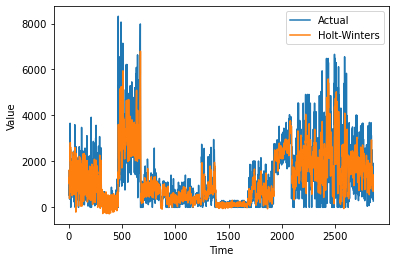

Holt-Winters MAE: 594.9472646876312
Holt-Winters RMSE: 915.6599052620332
Holt-Winters MAPE: inf


In [64]:
# Assuming 'data' is a pandas DataFrame with a column named 'values'

# Extract the column with values and convert to numeric format
values = pd.to_numeric(data['Units'])

# Split the data into training and testing sets
train_data, test_data = train_test_split(values, test_size=0.2, shuffle=False)

# Fit the Holt-Winters model
model_hw = ExponentialSmoothing(values, seasonal='add', seasonal_periods=12).fit()

# Get the predicted values
predictions_hw = model_hw.predict(start=0, end=len(values)-1)

# Plot the actual and predicted values
plt.plot(values, label='Actual')
plt.plot(predictions_hw, label='Holt-Winters')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Calculate the evaluation metrics
mae_hw = mean_absolute_error(values, predictions_hw)
rmse_hw = np.sqrt(mean_squared_error(values, predictions_hw))
mape_hw = np.mean(np.abs((values - predictions_hw) / values)) * 100

print("Holt-Winters MAE:", mae_hw)
print("Holt-Winters RMSE:", rmse_hw)
print("Holt-Winters MAPE:", mape_hw)



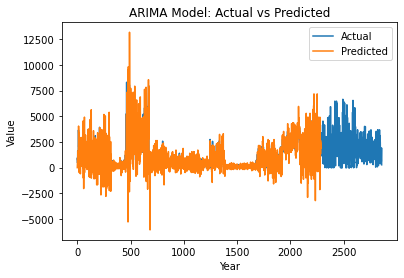

In [65]:
import matplotlib.pyplot as plt

# Plot the predicted values against the actual values
plt.plot(actual_values, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('ARIMA Model: Actual vs Predicted')
plt.legend()
plt.show()

In [66]:
import numpy as np

# Get predictions and actual values from the ARIMA model
predictions = model_fit.predict()
actual_values = data['Units']

# Reset index for predictions and actual_values
predictions = predictions.reset_index(drop=True)
actual_values = actual_values.reset_index(drop=True)

# Remove missing values
valid_indices = np.logical_and(~np.isnan(predictions), ~np.isnan(actual_values))
predictions = predictions[valid_indices]
actual_values = actual_values[valid_indices]

# Calculate evaluation metrics
mae = np.mean(np.abs(predictions - actual_values))
mse = np.mean((predictions - actual_values) ** 2)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Mean Absolute Error(MAE) for ARIMA:", mae)
print("Mean Squared Error (MSE) for ARIMA:", mse)
print("Root Mean Squared Error(RMSE) for ARIMA:", rmse)



Mean Absolute Error(MAE) for ARIMA: 468.52023064395763
Mean Squared Error (MSE) for ARIMA: 565365.9567637598
Root Mean Squared Error(RMSE) for ARIMA: 751.908210331394
